# Analyzing PM 2.5 Global Air Pollution - Data Visualization Portfolio Project

This project analyzes fine particulate matter (PM2.5) pollution data for countries around the world from 2010 to 2017. PM2.5 refers to tiny airborne particles less than 2.5 microns in diameter that can enter the lungs and bloodstream, leading to negative health impacts. The aim of this analysis is to identify overall trends, regional differences, and country-level changes in PM2.5 pollution over time. Specifically, we will visualize the global trend using a line chart, highlight countries with the biggest increases and decreases using a bar chart, and create a choropleth map to display regional pollution levels in 2017. 

Examining PM2.5 pollution data can provide valuable insights into air quality changes globally and nationally. Reducing particulate matter pollution is an important public health goal, so identifying patterns and problem areas through data analysis is key for targeting interventions and monitoring progress. This project will analyze the recent trends to better understand where and how PM2.5 levels are changing around the world.

## Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

## Load The Data

In [10]:
pm_pol = pd.read_csv('PM2.5 Global Air Pollution 2010-2017.csv')
pm_pol.head(229)

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259
...,...,...,...,...,...,...,...,...,...,...
224,Ukraine,UKR,23.522656,23.971104,22.328793,21.532400,20.486895,21.246455,20.618187,20.309776
225,Upper middle income,UMC,49.417762,49.873938,45.977393,46.579755,42.979937,42.714935,38.577867,38.748285
226,Uruguay,URY,11.027056,11.468732,10.567295,10.455606,9.926816,9.659454,9.197441,9.274883
227,United States of America,USA,9.358636,9.740641,9.003163,8.734777,8.220720,8.063920,7.406464,7.409442


## Data Inspection And Cleaning

In [11]:
# Check number of rows and columns
print("Number Of Rows And Columns:")
print(pm_pol.shape)
print("--------------")

# Get column names
print("Column Names:")
print(pm_pol.columns)
print("--------------")

# Check data types of columns
print("Data Types:")
print(pm_pol.dtypes)
print("--------------")

# Check for null values
print("Checking For Null Values:")
print(pm_pol.isnull().sum())
print("--------------")

# Get basic stats like mean, min, max for numeric columns
print("View Basic Dataframe Information:")
print(pm_pol.describe())

Number Of Rows And Columns:
(240, 10)
--------------
Column Names:
Index(['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')
--------------
Data Types:
Country Name     object
Country Code     object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
dtype: object
--------------
Checking For Null Values:
Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
dtype: int64
--------------
View Basic Dataframe Information:
             2010        2011        2012        2013        2014        2015  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean    30.872419   31.131758   30.340594   29.790453   28.683781   30.579

The datasets look intact and free from null values. We will now begin visualizing our data, pursuing the questions raised in the opening summary paragraph.

## Visualizing The Data

### Question 1: How has average PM2.5 pollution changed over time globally?

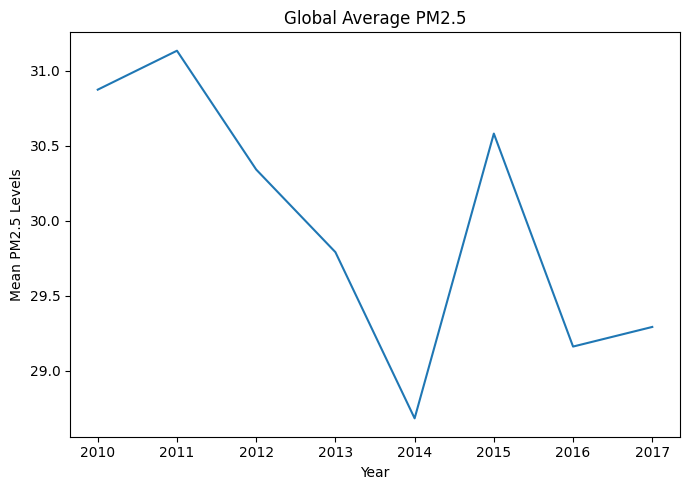

In [12]:
# Select columns to aggregate
pm_cols = pm_pol.columns[2:10] 

# Take mean of selected columns
global_means = pm_pol[pm_cols].mean()

# Reset index 
global_means = global_means.reset_index()

global_means
# Rename columns
global_means.columns = ['Year', 'PM2.5']

# Create line chart
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [7.00, 5.00]
chart = sns.lineplot(data=global_means, x='Year', y="PM2.5")

# Add labels
chart.set_title('Global Average PM2.5')
chart.set(xlabel='Year', ylabel='Mean PM2.5 Levels') 

plt.show()

### Which countries have seen the biggest increases or decreases in PM2.5 pollution from 2010 to 2017?

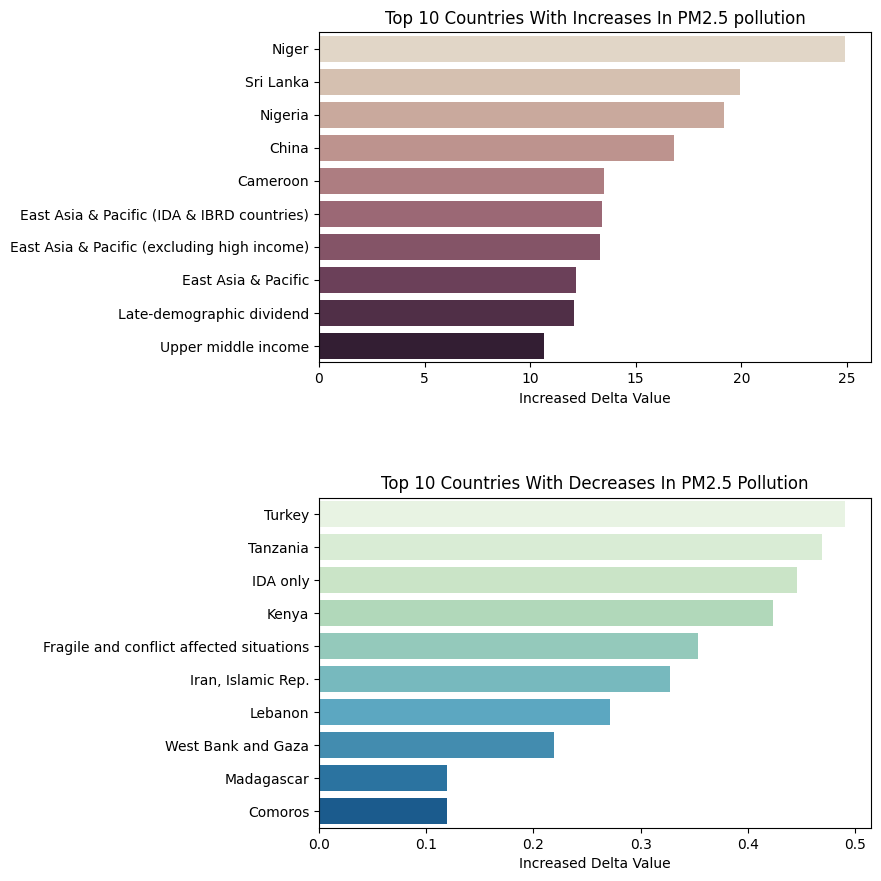

In [13]:
# Calculate absolute change from 2010 to 2017
pm_pol['Delta'] = abs(pm_pol['2010'] - pm_pol['2017'])

# Sort by absolute change 
pm_pol_sorted = pm_pol.sort_values('Delta', ascending=False)

# Get top 10 increases 
# print(pm_pol_sorted.iloc[0:10][['Country Name', '2010', '2017', 'Delta']])

# Get top 10 decreases
# print(pm_pol_sorted.iloc[-10:][['Country Name', '2010', '2017', 'Delta']])



# formatting barplot code
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [10.00, 10.00]
f, axes = plt.subplots(2, 1)


# country increases plot
cntry_increases = sns.barplot(data=pm_pol_sorted.iloc[0:10],
                              x="Delta",
                              y="Country Name",
                              palette="ch:.25",
                              errcolor="grey",
                              ax=axes[0])

cntry_increases.set(title="Top 10 Countries With Increases In PM2.5 pollution",
                    xlabel="Increased Delta Value",
                    ylabel="")


# country decreases plot
cntry_decreases = sns.barplot(data=pm_pol_sorted.iloc[-10:],
                              x="Delta",
                              y="Country Name",
                              palette="GnBu",
                              errcolor="grey",
                              ax=axes[1])

cntry_decreases.set(title="Top 10 Countries With Decreases In PM2.5 Pollution",
                    xlabel="Increased Delta Value",
                    ylabel="")


# Minor formatting
f.tight_layout(pad=5.0)
plt.show()

### Which regions of the world have the highest/lowest levels of PM2.5 pollution?

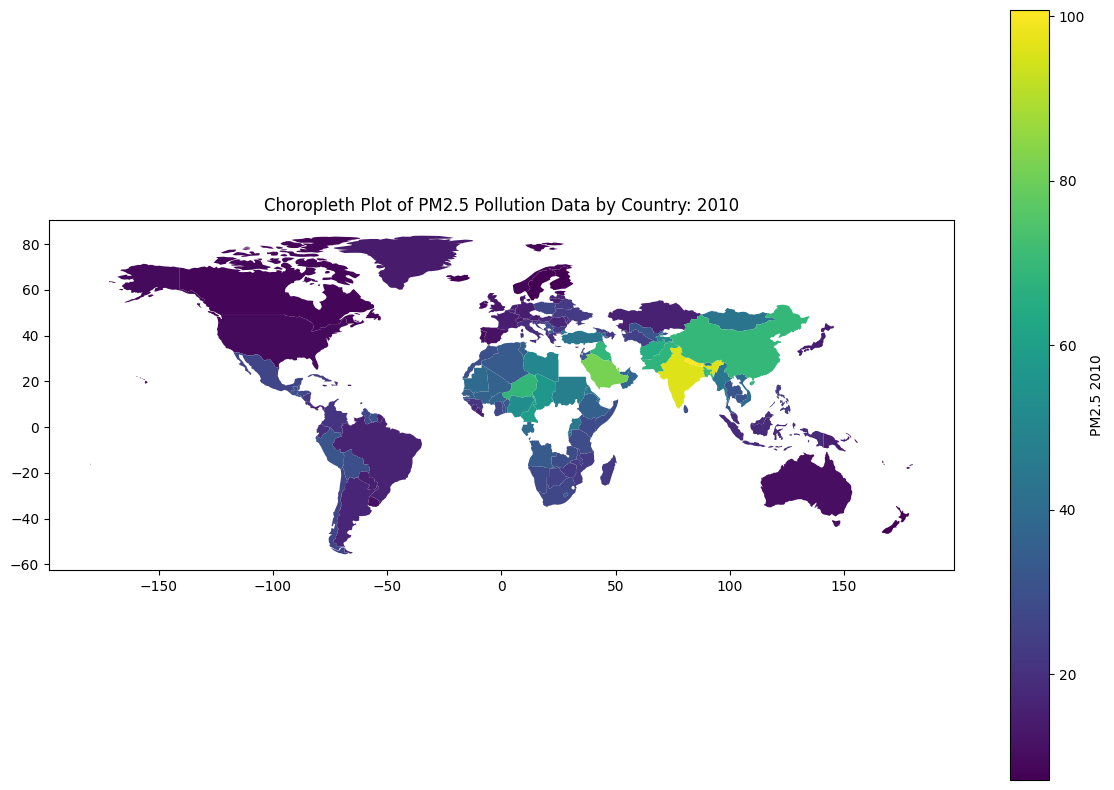

In [14]:
pollution_map = pm_pol[['Country Name', '2010']]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(pollution_map, left_on='name', right_on='Country Name', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(column='2010', ax=ax, legend=True, legend_kwds={'label': 'PM2.5 2010'})
ax.set_title('Choropleth Plot of PM2.5 Pollution Data by Country: 2010')

plt.show()